# **Machine Learning for Phising detection**

## 1. Importing Necessary Data

This section helps to import necessary libraries for the data training

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data
data = pd.read_csv("url.csv")
data.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,Label
0,confirmprofileaccount.com,0,0,0,0,0,1,1,0,1,1,1,1,1
1,marreme.com,0,0,0,2,0,1,0,0,1,1,1,1,1
2,modsecpaststudents.com,0,0,0,1,0,1,0,0,1,1,1,1,1
3,docs.google.com,0,0,1,5,0,1,0,0,1,1,1,1,1
4,oportunidadedasemana.com,0,0,1,1,1,1,0,0,1,1,1,1,1


## 2. Checking Data columns

In [3]:
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'Label'],
      dtype='object')

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         20000 non-null  object
 1   Have_IP        20000 non-null  int64 
 2   Have_At        20000 non-null  int64 
 3   URL_Length     20000 non-null  int64 
 4   URL_Depth      20000 non-null  int64 
 5   Redirection    20000 non-null  int64 
 6   https_Domain   20000 non-null  int64 
 7   TinyURL        20000 non-null  int64 
 8   Prefix/suffix  20000 non-null  int64 
 9   DNS_Record     20000 non-null  int64 
 10  Web_Traffic    20000 non-null  int64 
 11  Domain_Age     20000 non-null  int64 
 12  Domain_End     20000 non-null  int64 
 13  Label          20000 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 2.1+ MB


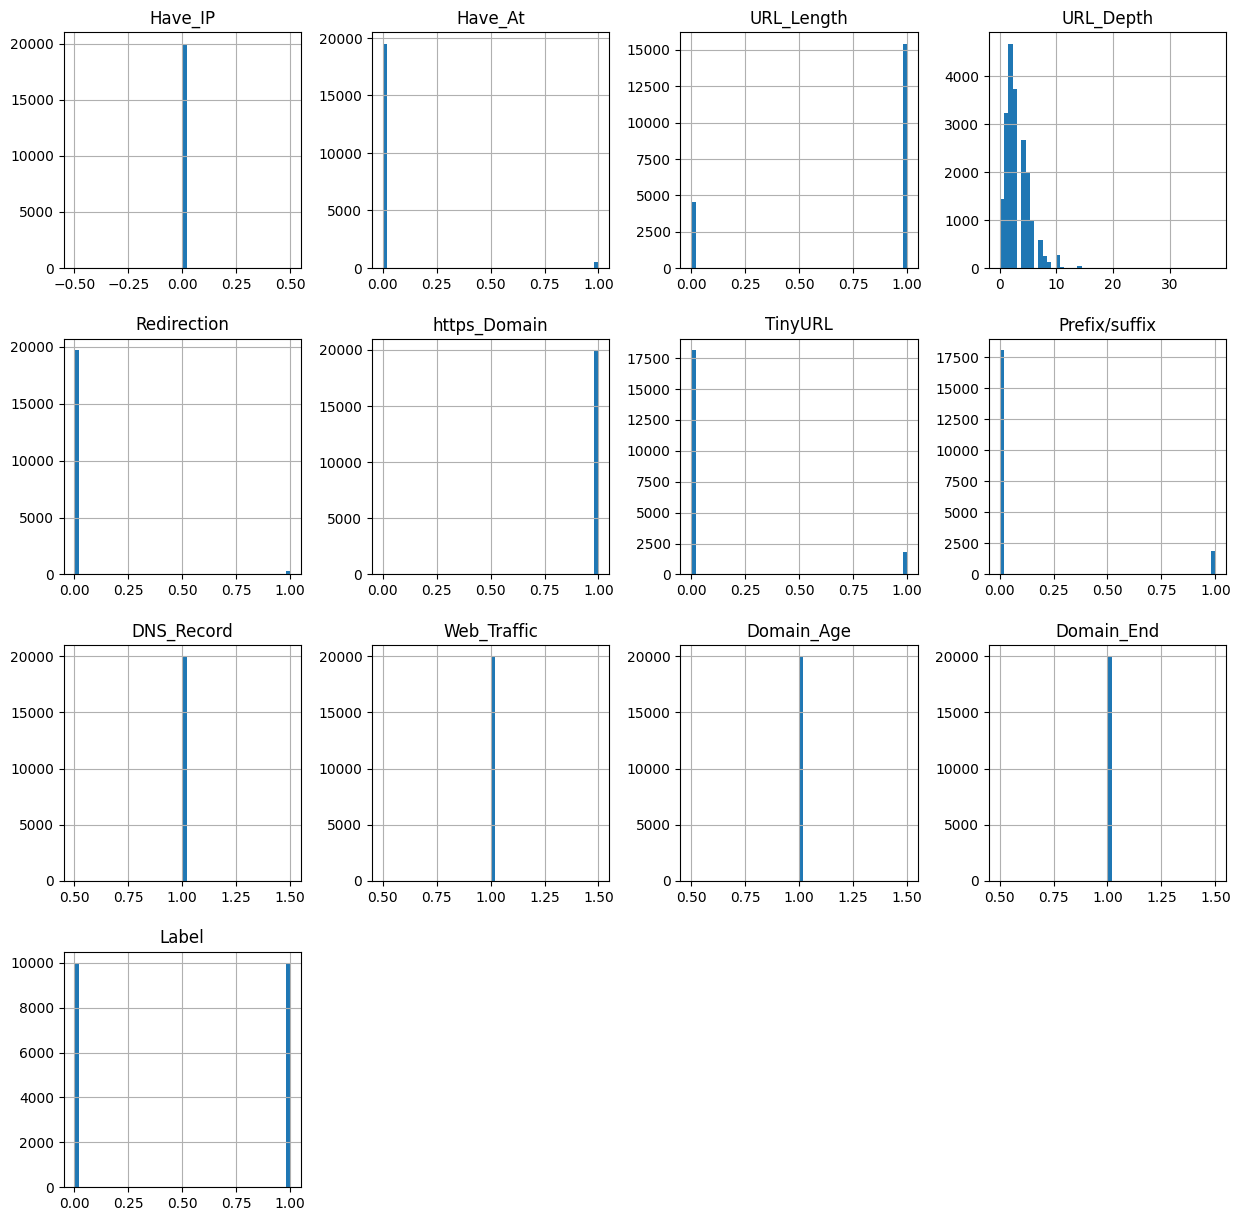

In [5]:
data.hist(bins = 50, figsize = (15, 15)) #bins is parameter for integer or sequence of string
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19816\1955206404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


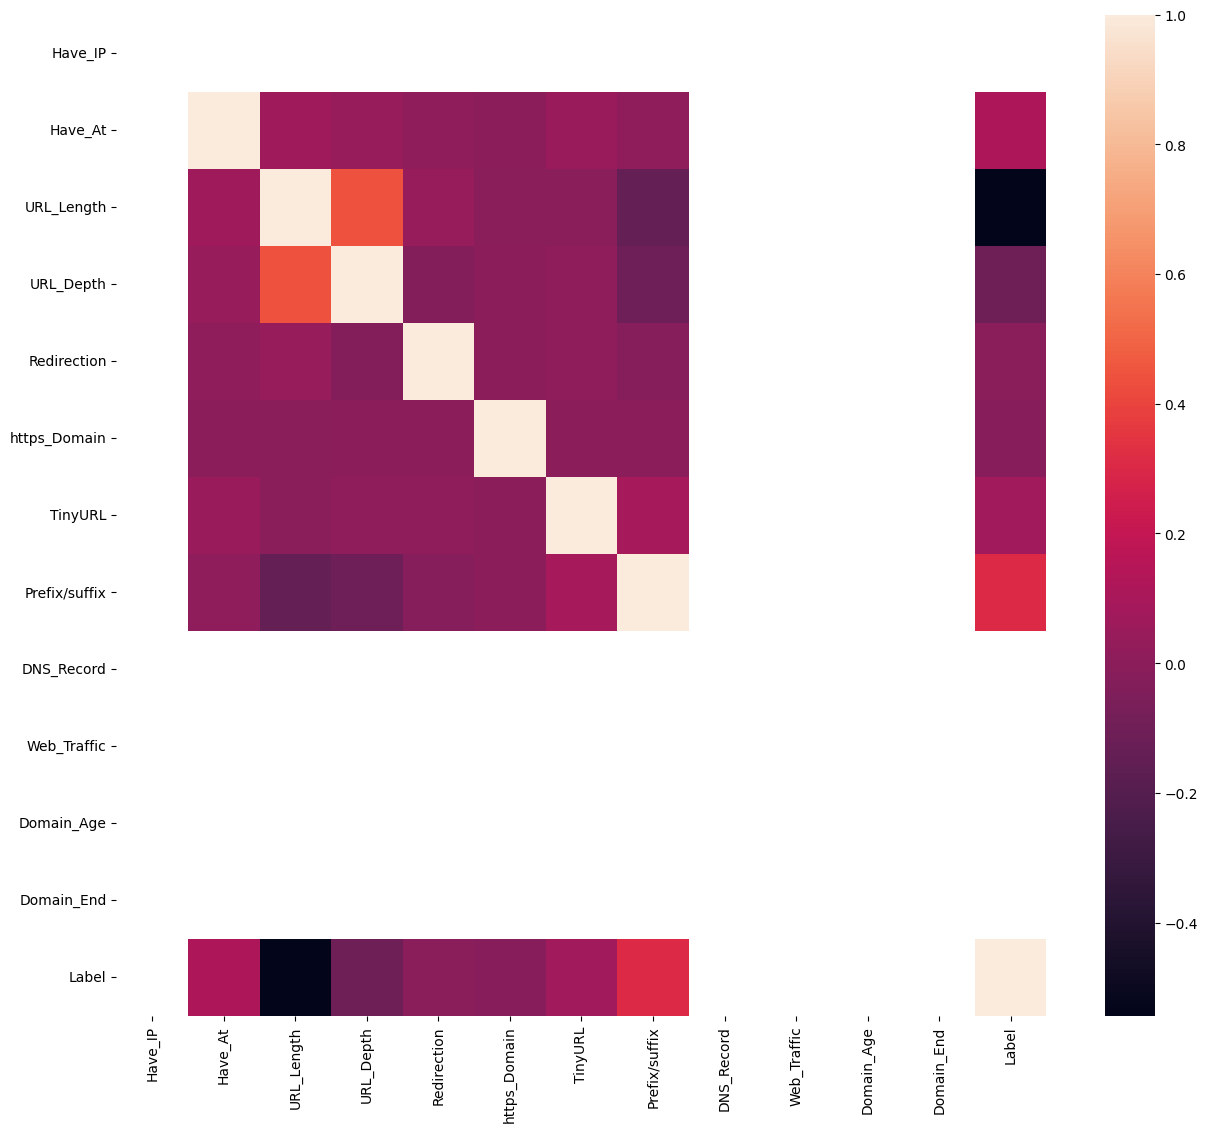

In [6]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

## 3. Processing the Data

In [7]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,Label
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.000000
mean,0.0,0.023950,0.772100,3.052850,0.013400,0.999800,0.092050,0.094800,1.0,1.0,1.0,1.0,0.500000
std,0.0,0.152897,0.419488,2.138688,0.114983,0.014141,0.289104,0.292946,0.0,0.0,0.0,0.0,0.500013
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.000000
max,0.0,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000


the unecessary data for machine learning data is dropped 

In [8]:
data = data.drop(['Domain'], axis = 1).copy()

In [9]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
Label            0
dtype: int64

In [10]:
data = data.sample(frac=1).reset_index(drop=True)
data.head() #shuffling the data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,Label
0,0,0,1,2,0,1,0,0,1,1,1,1,0
1,0,0,1,4,0,1,1,0,1,1,1,1,0
2,0,0,1,6,0,1,0,0,1,1,1,1,0
3,0,0,0,1,0,1,0,0,1,1,1,1,1
4,0,0,1,5,0,1,0,0,1,1,1,1,0


## 4. Splitting the Data

In [11]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20000, 12), (20000,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((16000, 12), (4000, 12))

## 5. Machine Learning Models and Techniques

There are different models and trainings for machine learning. The website is said to be legitimate if the input URL yields output 0 and phising if the result yields 1.




In [13]:
from sklearn.metrics import accuracy_score
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  

## Decision Tree Classifier 

In [14]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [16]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.804
Decision Tree: Accuracy on test Data: 0.797


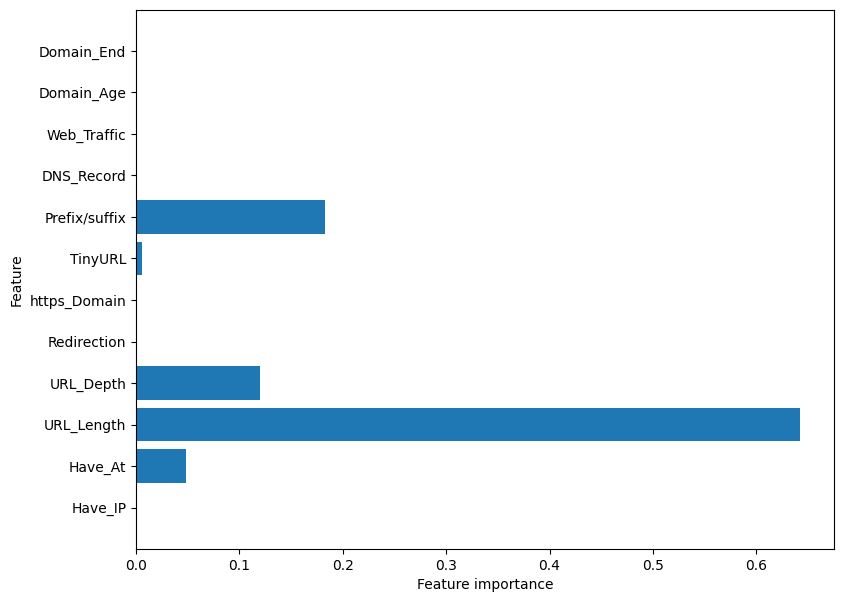

In [17]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [18]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## XG Boost Classifier

In [19]:

#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [20]:

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [21]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.816
XGBoost : Accuracy on test Data: 0.800


In [22]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## Comparision of Models

In [23]:

#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results 

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.804,0.797
1,XGBoost,0.816,0.800


In [37]:
new_data = {
    'Have_IP':[0],
    'Have_At':[0],
    'URL_Length':[1],
    'URL_Depth':[1],
    'Redirection':[0],
    'https_Domain':[1],
    'TinyURL':[0],
    'Prefix/Suffix':[0],
    'DNS_Record':[1],
    'Web_Traffic':[1],
    'Domain_Age':[1],
    'Domain_End':[1],
    
}

In [38]:
# Convert the new data into a DataFrame
new_data = pd.DataFrame(new_data)

In [39]:
# Use the predict method to make a prediction on the new data
prediction = tree.predict(new_data)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Prefix/Suffix
Feature names seen at fit time, yet now missing:
- Prefix/suffix

  warnings.warn(message, FutureWarning)


In [40]:
# The prediction will be an array with a single element, so you can access the prediction using index [0]
print("Prediction:", prediction)

Prediction: [0]


In [41]:
import pickle as pkl
pkl.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))